# Problem Statement: Product Recommendation Engine

### Steps -
1. Read and explore the given dataset. ( Rename column/add headers, plot histograms, find data characteristics)

2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )

3. Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)

4. Build Popularity Recommender model.

5. Build Collaborative Filtering model.

6. Evaluate both the models. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models.

7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.

8. Summarise your insights.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('electronics.csv')
data_1 = pd.read_csv('modcloth.csv')

In [3]:
data

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0
...,...,...,...,...,...,...,...,...,...,...
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2017,NaN,0
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,NaN,2017,NaN,0
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,NaN,2016,NaN,0
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,NaN,2018,NaN,0


In [4]:
data_1

,item_id,user_id,rating,timestamp,size,fit,user_attr,model_attr,category,brand,year,split
0,7443,Alex,4,2010-01-21 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
1,7443,carolyn.agan,3,2010-01-27 08:00:00+00:00,NaN,NaN,NaN,Small,Dresses,NaN,2012,0
2,7443,Robyn,4,2010-01-29 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
3,7443,De,4,2010-02-13 08:00:00+00:00,NaN,NaN,NaN,Small,Dresses,NaN,2012,0
4,7443,tasha,4,2010-02-18 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99888,154797,BernMarie,5,2019-06-26 21:15:13.165000+00:00,6.0,Just right,Large,Small&Large,Dresses,NaN,2017,0
99889,77949,Sam,4,2019-06-26 23:22:29.633000+00:00,4.0,Slightly small,Small,Small&Large,Bottoms,NaN,2014,2
99890,67194,Janice,5,2019-06-27 00:20:52.125000+00:00,NaN,Just right,Small,Small&Large,Dresses,NaN,2013,2
99891,71607,amy,3,2019-06-27 15:45:06.250000+00:00,NaN,Slightly small,Small,Small&Large,Outerwear,Jack by BB Dakota,2016,2


### Rename column/add headers

In [5]:
data['model_attr'].unique()

array(['Female', 'Female&Male', 'Male'], dtype=object)

In [6]:
data_1['model_attr'].unique()

array(['Small', 'Small&Large'], dtype=object)

### Dropping the "timestamp" as it is not a needed field

In [7]:
data = data.drop(['brand', 'timestamp', 'year', 'model_attr', 'user_attr'], axis=1)

In [8]:
data_1 = data_1.drop(['brand', 'size', 'fit', 'timestamp', 'year', 'model_attr', 'user_attr'], axis=1)

In [9]:
data

,item_id,user_id,rating,category,split
0,0,0,5.0,Portable Audio & Video,0
1,0,1,5.0,Portable Audio & Video,0
2,0,2,3.0,Portable Audio & Video,0
3,0,3,1.0,Portable Audio & Video,0
4,0,4,2.0,Portable Audio & Video,0
...,...,...,...,...,...
1292949,9478,1157628,1.0,Headphones,0
1292950,9435,1157629,5.0,Computers & Accessories,0
1292951,9305,1157630,3.0,Computers & Accessories,0
1292952,9303,1157631,5.0,Headphones,0


In [10]:
data_1

,item_id,user_id,rating,category,split
0,7443,Alex,4,Dresses,0
1,7443,carolyn.agan,3,Dresses,0
2,7443,Robyn,4,Dresses,0
3,7443,De,4,Dresses,0
4,7443,tasha,4,Dresses,0
...,...,...,...,...,...
99888,154797,BernMarie,5,Dresses,0
99889,77949,Sam,4,Bottoms,2
99890,67194,Janice,5,Dresses,2
99891,71607,amy,3,Outerwear,2


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
item_id,1292954.0,4183.588261,2525.345511,0.0,2018.00,3930.0,6289.00,9559.0
user_id,1292954.0,560512.696322,334237.399854,0.0,269748.25,551892.0,847485.75,1157632.0
rating,1292954.0,4.051482,1.379732,1.0,4.00,5.0,5.00,5.0
split,1292954.0,0.174759,0.550681,0.0,0.00,0.0,0.00,2.0


In [12]:
data_1.describe().T

,count,mean,std,min,25%,50%,75%,max
item_id,99893.0,83944.091208,43558.135979,6454.0,48629.0,77878.0,120126.0,155950.0
rating,99893.0,4.209594,1.080633,1.0,4.0,5.0,5.0,5.0
split,99893.0,0.358564,0.720993,0.0,0.0,0.0,0.0,2.0


In [13]:
tip2 = dict(data_1['user_id'].value_counts())
data_1['user_id'] = data_1['user_id'].map(tip2)

In [14]:
data_1.head()

,item_id,user_id,rating,category,split
0,7443,66.0,4,Dresses,0
1,7443,1.0,3,Dresses,0
2,7443,30.0,4,Dresses,0
3,7443,1.0,4,Dresses,0
4,7443,12.0,4,Dresses,0


In [15]:
data.head()

,item_id,user_id,rating,category,split
0,0,0,5.0,Portable Audio & Video,0
1,0,1,5.0,Portable Audio & Video,0
2,0,2,3.0,Portable Audio & Video,0
3,0,3,1.0,Portable Audio & Video,0
4,0,4,2.0,Portable Audio & Video,0


In [16]:
data = data.dropna(subset=['rating', 'user_id'], how='all')
data_1 = data_1.dropna(subset=['rating', 'user_id'], how='all')

In [17]:
tip3 = dict(data_1['category'].value_counts())
data_1['category'] = data_1['category'].map(tip3)

In [18]:
tip4 = dict(data['category'].value_counts())
data['category'] = data['category'].map(tip4)

In [19]:
data

,item_id,user_id,rating,category,split
0,0,0,5.0,143370,0
1,0,1,5.0,143370,0
2,0,2,3.0,143370,0
3,0,3,1.0,143370,0
4,0,4,2.0,143370,0
...,...,...,...,...,...
1292949,9478,1157628,1.0,359334,0
1292950,9435,1157629,5.0,322938,0
1292951,9305,1157630,3.0,322938,0
1292952,9303,1157631,5.0,359334,0


In [20]:
data_1

,item_id,user_id,rating,category,split
0,7443,66.0,4,34160,0
1,7443,1.0,3,34160,0
2,7443,30.0,4,34160,0
3,7443,1.0,4,34160,0
4,7443,12.0,4,34160,0
...,...,...,...,...,...
99888,154797,1.0,5,34160,0
99889,77949,36.0,4,23625,2
99890,67194,20.0,5,34160,2
99891,71607,116.0,3,7131,2


In [21]:
data['rating'] = data['rating'].apply(np.int64)
data_1['rating'] = data_1['rating'].apply(np.int64)

In [22]:
data_1.dropna(subset=['user_id'], how='all', inplace=True)

In [23]:
data_1['user_id'] = data_1['user_id'].apply(np.int64)
data_1['user_id'] = data_1['user_id'].apply(np.int64)

### Merging Two DataFrames

In [24]:
data

,item_id,user_id,rating,category,split
0,0,0,5,143370,0
1,0,1,5,143370,0
2,0,2,3,143370,0
3,0,3,1,143370,0
4,0,4,2,143370,0
...,...,...,...,...,...
1292949,9478,1157628,1,359334,0
1292950,9435,1157629,5,322938,0
1292951,9305,1157630,3,322938,0
1292952,9303,1157631,5,359334,0


In [25]:
data_1

,item_id,user_id,rating,category,split
0,7443,66,4,34160,0
1,7443,1,3,34160,0
2,7443,30,4,34160,0
3,7443,1,4,34160,0
4,7443,12,4,34160,0
...,...,...,...,...,...
99888,154797,1,5,34160,0
99889,77949,36,4,23625,2
99890,67194,20,5,34160,2
99891,71607,116,3,7131,2


In [26]:
data.dtypes

item_id     int64
user_id     int64
rating      int64
category    int64
split       int64
dtype: object

In [27]:
data.dtypes

item_id     int64
user_id     int64
rating      int64
category    int64
split       int64
dtype: object

In [28]:
combine = [data, data_1]
combine = pd.concat(combine)
combine

,item_id,user_id,rating,category,split
0,0,0,5,143370,0
1,0,1,5,143370,0
2,0,2,3,143370,0
3,0,3,1,143370,0
4,0,4,2,143370,0
...,...,...,...,...,...
99888,154797,1,5,34160,0
99889,77949,36,4,23625,2
99890,67194,20,5,34160,2
99891,71607,116,3,7131,2


### Plot Histogram & Bar Plot

array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

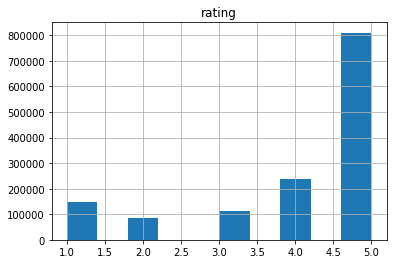

In [29]:
combine.hist('rating',bins = 10)

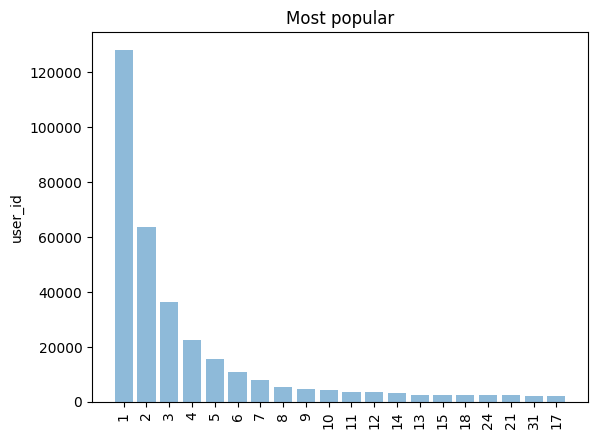

In [30]:
popular = combine[['user_id','rating']].groupby('user_id').sum().reset_index()
popular_20 = popular.sort_values('rating', ascending=False).head(n=20)
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = (list(popular_20['user_id']))
y_pos = np.arange(len(objects))
performance = list(popular_20['rating'])
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('user_id')
plt.title('Most popular')
 
plt.show()

In [31]:
# find unique users
combine.user_id.value_counts()

1          30308
2          15221
3           8635
4           5321
5           3696
           ...  
1096562        1
1094515        1
1084276        1
1082229        1
2047           1
Name: user_id, Length: 1157633, dtype: int64

In [32]:
print('Number of unique users', len(combine['user_id'].unique()))

Number of unique users 1157633


In [33]:
print('Number of unique products', len(combine['item_id'].unique()))

Number of unique products 10578


In [34]:
min_ratings = combine[(combine['rating'] < 2.0)]

In [35]:
print('Number of unique products rated low',len(min_ratings['item_id'].unique()))

Number of unique products rated low 8140


In [36]:
mid_ratings = combine[(combine['rating'] > 2.0) & (combine['rating'] < 4.0)]

In [37]:
print('Number of unique products rated medium',len(mid_ratings['item_id'].unique()))

Number of unique products rated medium 8210


In [38]:
max_ratings = combine[combine['rating'] >= 4.0]

In [39]:
print('Number of unique products rated high',len(max_ratings['item_id'].unique()))

Number of unique products rated high 10535


In [40]:
avg_rating_prod = combine.groupby('item_id').sum() / combine.groupby('item_id').count()

In [41]:
avg_rating_prod.drop('user_id', axis=1,inplace =True)

In [42]:
print('Top 10 highly rated products \n',avg_rating_prod.nlargest(10,'rating'))

Top 10 highly rated products 
          rating  category  split
item_id                         
30          5.0  192573.0    0.2
194         5.0   24193.0    0.0
221         5.0  158598.0    0.0
444         5.0  322938.0    0.0
599         5.0  192573.0    0.4
657         5.0  192573.0    0.0
1086        5.0  192573.0    0.0
1095        5.0  192573.0    0.0
1237        5.0   24193.0    0.4
1247        5.0  192573.0    0.4


###   Keep the Users only who has given 50 or more number of ratings

In [43]:
user_id = combine.groupby('user_id').count()

In [44]:
top_user = user_id[user_id['rating'] >= 50].index

In [45]:
topuser_ratings_data = combine[combine['user_id'].isin(top_user)]

In [46]:
topuser_ratings_data.shape

(100047, 5)

In [47]:
topuser_ratings_data.head()

,item_id,user_id,rating,category,split
1,0,1,5,143370,0
2,0,2,3,143370,0
3,0,3,1,143370,0
4,0,4,2,143370,0
5,0,5,2,143370,0


In [48]:
topuser_ratings_data.sort_values(by='rating', ascending=False).head()

,item_id,user_id,rating,category,split
1,0,1,5,143370,0
49070,49525,1,5,34160,0
48928,134026,4,5,34977,0
48930,132261,4,5,34977,0
48931,110004,2,5,34977,0


### Keep data only for Items that have 50 or more ratings

In [49]:
item_id = combine.groupby('item_id').count()

In [50]:
top_prod = item_id[item_id['rating'] >= 50].index

In [51]:
top_ratings_data = topuser_ratings_data[topuser_ratings_data['item_id'].isin(top_prod)]

In [52]:
top_ratings_data.head()

,item_id,user_id,rating,category,split
1,0,1,5,143370,0
2,0,2,3,143370,0
3,0,3,1,143370,0
4,0,4,2,143370,0
5,0,5,2,143370,0


In [53]:
top_ratings_data.sort_values(by='rating', ascending=False).head()

,item_id,user_id,rating,category,split
1,0,1,5,143370,0
36043,67507,1,5,34977,0
68638,27439,4,5,7131,0
68636,141853,1,5,34160,0
36035,78573,3,5,34160,0


In [54]:
top_ratings_data.shape

(89182, 5)

In [55]:
data = pd.get_dummies(top_ratings_data, columns=['split'])
data

,item_id,user_id,rating,category,split_0,split_1,split_2
1,0,1,5,143370,1,0,0
2,0,2,3,143370,1,0,0
3,0,3,1,143370,1,0,0
4,0,4,2,143370,1,0,0
5,0,5,2,143370,1,0,0
...,...,...,...,...,...,...,...
99888,154797,1,5,34160,1,0,0
99889,77949,36,4,23625,0,0,1
99890,67194,20,5,34160,0,0,1
99891,71607,116,3,7131,0,0,1


### Split Data in 70/30 ratio

In [56]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size = 0.30, random_state=0)

In [57]:
train_data

,item_id,user_id,rating,category,split_0,split_1,split_2
11832,49587,55,4,34160,1,0,0
33257,40899,2,2,34977,1,0,0
62224,120558,1,5,23625,1,0,0
31445,110820,14,5,7131,1,0,0
8327,67197,2,5,34977,0,0,1
...,...,...,...,...,...,...,...
21105,112771,3,4,34977,1,0,0
45781,133300,14,5,34160,1,0,0
42481,57138,1,5,34160,1,0,0
43440,27439,4,1,7131,0,0,1


In [58]:
test_data

,item_id,user_id,rating,category,split_0,split_1,split_2
94987,69157,9,4,34160,1,0,0
29476,105202,122,5,23625,1,0,0
65698,134265,126,2,23625,1,0,0
47733,120558,2,4,23625,0,0,1
28901,109327,1,5,23625,1,0,0
...,...,...,...,...,...,...,...
51935,137370,4,5,34977,0,1,0
73845,28252,2,1,34160,0,0,1
38668,70538,1,5,34160,1,0,0
70321,114770,25,5,34977,1,0,0


In [59]:
train_data_grouped = train_data.groupby('item_id').mean().reset_index()

In [60]:
train_data_grouped.head()

,item_id,user_id,rating,category,split_0,split_1,split_2
0,0,59.564516,3.645161,143370.0,1.000000,0.0,0.000000
1,1,99.875000,4.875000,322938.0,1.000000,0.0,0.000000
2,2,110.166667,4.166667,359334.0,0.833333,0.0,0.166667
3,3,98.363636,4.272727,192573.0,1.000000,0.0,0.000000
4,14,227.000000,4.500000,192573.0,1.000000,0.0,0.000000


In [61]:
train_data_sort = train_data_grouped.sort_values(['rating', 'item_id'], ascending=False)

In [62]:
train_data_sort.head()

,item_id,user_id,rating,category,split_0,split_1,split_2
18,9046,7.000,5.000,158598.0,0.0,0.0,1.0
10,983,96.000,5.000,322938.0,0.0,0.0,1.0
9,840,28.000,5.000,192573.0,1.0,0.0,0.0
8,710,132.000,5.000,322938.0,0.0,0.0,1.0
1,1,99.875,4.875,322938.0,1.0,0.0,0.0


In [63]:
train_data.groupby('item_id')['rating'].count().sort_values(ascending=False).head(10)

item_id
34935    1337
32405    1134
21296    1133
32406    1059
32403     981
67507     918
16411     897
55967     810
57369     787
82288     773
Name: rating, dtype: int64

In [64]:
ratings_mean_count = pd.DataFrame(train_data.groupby('item_id')['rating'].mean())

In [65]:
ratings_mean_count['rating_counts'] = pd.DataFrame(train_data.groupby('item_id')['rating'].count())

In [66]:
ratings_mean_count.head()

,rating,rating_counts
item_id,,
0,3.645161,62
1,4.875000,8
2,4.166667,6
3,4.272727,11
14,4.500000,2


In [67]:
pred_df = test_data[['user_id', 'item_id', 'rating']]

In [68]:
pred_df.rename(columns = {'rating' : 'true_rating'}, inplace=True)

In [69]:
pred_df = pred_df.merge(train_data_sort, left_on='item_id', right_on = 'item_id')

In [70]:
pred_df.head()

,user_id_x,item_id,true_rating,user_id_y,rating,category,split_0,split_1,split_2
0,9,69157,4,17.692623,4.592213,34160.0,0.754098,0.055328,0.190574
1,2,69157,4,17.692623,4.592213,34160.0,0.754098,0.055328,0.190574
2,73,69157,5,17.692623,4.592213,34160.0,0.754098,0.055328,0.190574
3,21,69157,3,17.692623,4.592213,34160.0,0.754098,0.055328,0.190574
4,1,69157,5,17.692623,4.592213,34160.0,0.754098,0.055328,0.190574


In [71]:
pred_df.rename(columns = {'rating' : 'predicted_ratings'}, inplace = True)

In [ ]:
pred_df = pred_df.drop(columns = ['user_id_y'])
pred_df = pred_df.rename(columns = {"user_id_x": "user_id"},errors="raise")
pred_df

In [73]:
import sklearn.metrics as metric
from math import sqrt
MSE = metric.mean_squared_error(pred_df['true_rating'], pred_df['predicted_ratings'])
print('The RMSE value for Recommendation system is', sqrt(MSE))

The RMSE value for Recommendation system is 1.0348814143175968


### Build Collaborative Filtering model

In [74]:
import surprise
from surprise import KNNWithMeans
from surprise.model_selection import GridSearchCV
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

In [75]:
from surprise import KNNBasic, SVD, NormalPredictor, KNNBaseline,KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering, Reader, dataset, accuracy

### Converting Pandas Dataframe to Surpise format

In [76]:
reader = Reader(rating_scale=(0.5, 5.0))

In [77]:
data = Dataset.load_from_df(top_ratings_data[['user_id', 'item_id', 'rating']],reader)

In [78]:
# Split data to train and test
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.3,random_state=0)

In [79]:
type(trainset)

surprise.trainset.Trainset

### Training the model

In [80]:
algo_user = KNNWithMeans(k=10, min_k=6, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo_user.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [81]:
svd_model = SVD(n_factors=50,reg_all=0.02)
svd_model.fit(trainset)

### Evaluate both the models. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models.

In [82]:
MSE = metric.mean_squared_error(pred_df['true_rating'], pred_df['predicted_ratings'])
print('The RMSE value for Recommendation System is', sqrt(MSE))

The RMSE value for Recommendation System is 1.0348814143175968


In [83]:
print(len(testset))
type(testset)

26755


list

In [84]:
# Evalute on test set
test_pred = algo_user.test(testset)
test_pred[0]

Prediction(uid=2, iid=63583, r_ui=5.0, est=4.3, details={'actual_k': 10, 'was_impossible': False})

In [85]:
# compute RMSE
accuracy.rmse(test_pred) #range of value of error

RMSE: 1.1060


1.1060010332686214

In [86]:
test_pred = svd_model.test(testset)

In [87]:
# compute RMSE
accuracy.rmse(test_pred)

RMSE: 1.0381


1.0380837541254089

In [88]:
from surprise.model_selection import GridSearchCV
param_grid = {'n_factors' : [5,10,15], "reg_all":[0.01,0.02]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3,refit = True)

In [89]:
gs.fit(data)

In [90]:
# get best parameters
gs.best_params

{'rmse': {'n_factors': 5, 'reg_all': 0.02}}

In [91]:
# Use the "best model" for prediction
gs.test(testset)
accuracy.rmse(gs.test(testset))

RMSE: 1.0223


1.0222951806726814

### Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.

In [92]:
from collections import defaultdict
def get_top_n(predictions, n=5):
  
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [93]:
top_n = get_top_n(test_pred, n=5)


In [94]:
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

2 [133539, 133539, 144572, 144572, 154064]
41 [144572, 40899, 34937, 118020, 59176]
1 [144572, 144572, 144572, 144572, 144572]
5 [133539, 122266, 122266, 122266, 67022]
3 [133539, 122266, 122266, 122266, 122266]
4 [137370, 137370, 137370, 137370, 137370]
78 [122266, 64745, 63583, 137370, 47325]
35 [52406, 122266, 141255, 153709, 27439]
7 [144572, 122266, 114770, 114770, 143764]
33 [111984, 69630, 67022, 52406, 40899]
9 [135555, 153881, 116736, 80427, 80427]
39 [32236, 32236, 32236, 34931, 40141]
6 [146503, 52406, 52406, 52406, 52406]
146 [70230, 69157, 107794, 63583, 80841]
19 [145278, 137370, 82256, 140641, 140641]
32 [137731, 112559, 112559, 112559, 67022]
14 [137370, 118020, 118020, 118020, 146840]
188 [61110, 146503, 133539, 116736, 148245]
184 [141025, 137370, 114371, 140727, 111781]
10 [80841, 80841, 80841, 34931, 77949]
70 [145278, 143764, 116736, 80841, 80841]
176 [67022, 146503, 122266, 76049, 133539]
11 [27439, 137370, 137370, 70230, 143764]
144 [116736, 114371, 67194, 135555